# Social Media Sanctions and Misinformation Sharing
Sotirios - Panagiotis Koulouridis 

In [3]:
import pandas as pd

# Load the data file
data = pd.read_csv("mosleh_et_al_data.csv")

# Display the first few rows
print(data.head())


   politics_sites2  politics_sites1  politics_followed  lowqual_pr2019_crowd  \
0        -0.231902        -1.168745          -0.080295              0.598883   
1         0.405261         1.060905           2.296375              0.774873   
2        -0.171067        -0.500076          -2.312730              0.548727   
3        -0.085814        -0.748035          -1.507481              0.611501   
4         0.595367         1.347730           2.010573              0.700217   

   lowqual_pr2019_fc  lowqual_afm  lowqual_mbfc  lowqual_lasser2019  \
0           0.279221     0.185315      0.292807            0.350000   
1           0.848639     0.614156      0.513147            0.975087   
2           0.242347     0.130950      0.242445            0.300000   
3           0.360119     0.180055      0.277793            0.316038   
4           0.698661     0.430655      0.554609            0.763889   

   suspended  politics_hashtag  ...  valence_neg  valence_neu  valence_pos  \
0          0  

## Twitter Suspensions after the 2020 Election 

Using cross tabulation for `politics_hashtang` and `suspended` in order to show that #Trump2020 was 4.4 more likely to be suspended than #VoteBidenHarris2020

We firstly map 0 and 1 to `#VoteBidenHarris2020` and `#Trump2020` to make it easier .

Then we perform crosstabulation using pandas (pd) crosstab method . We have 1 without and 1 with totals .

Then calculate the suspention rate by simply doing suspended sum / total sum


In [4]:
# Map 0 and 1 to descriptive names
data['politics_hashtag'] = data['politics_hashtag'].map({
    0: '#VoteBidenHarris2020',
    1: '#Trump2020'
})

# Crosstabulation for politics_hashtag and suspended
crosstab = pd.crosstab(data['politics_hashtag'], data['suspended'])
print(crosstab )
print("\n")

# Adding margins for totals
crosstab_with_totals = pd.crosstab(data['politics_hashtag'], data['suspended'], margins=True)
print(crosstab_with_totals)

# Suspension rates
trump_suspension_rate = crosstab.loc['#Trump2020', 1] / crosstab.loc['#Trump2020'].sum()
biden_suspension_rate = crosstab.loc['#VoteBidenHarris2020', 1] / crosstab.loc['#VoteBidenHarris2020'].sum()
likelihood_ratio = trump_suspension_rate / biden_suspension_rate
print("\n")

print(f"Suspension rate for #Trump2020: {trump_suspension_rate:.4f}")
print(f"Suspension rate for #VoteBidenHarris2020: {biden_suspension_rate:.4f}")
print(f"Likelihood ratio: {likelihood_ratio:.2f}")



suspended                0    1
politics_hashtag               
#Trump2020            3623  882
#VoteBidenHarris2020  4295  200


suspended                0     1   All
politics_hashtag                      
#Trump2020            3623   882  4505
#VoteBidenHarris2020  4295   200  4495
All                   7918  1082  9000


Suspension rate for #Trump2020: 0.1958
Suspension rate for #VoteBidenHarris2020: 0.0445
Likelihood ratio: 4.40


Performing a $\chi^2$ test using scipy. We are getting the chi-square statistic , p-value , degree of freedom , and expected frequencies .

In [5]:
from scipy.stats import chi2_contingency

chi2, p, freedom, expected = chi2_contingency(crosstab)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {freedom}")
print("Expected Frequencies:\n", expected)


Chi-Square Statistic: 485.46706126582285
p-value: 1.3808204811294585e-107
Degrees of Freedom: 1
Expected Frequencies:
 [[3963.39888889  541.60111111]
 [3954.60111111  540.39888889]]


Chi-Square Statistic is suggesting that the observed data significantly deviates from what would be expected under the assumption of independence.

The p-value is well below the standard significance threshold (α=0.05), indicating a statistically significant association between the two variables. This suggests that the observed differences between the groups are highly unlikely to have occurred by chance.
The substantial difference between the observed and expected frequencies indicates that the use of specific hashtags may be strongly associated with the likelihood of suspension.


## Distributions of Relative Frequency of Low Quality 

Plot the distributions of low-quality sharing as determined by eight professional fact-checkers .

We are using z-scores to standarize x-axis .  The formula for calculating the z-scores is :
$$
z = \frac{x - \mu}{\sigma}
$$

Then we use matplotlib.pyplot and seaborn  to make the plot .

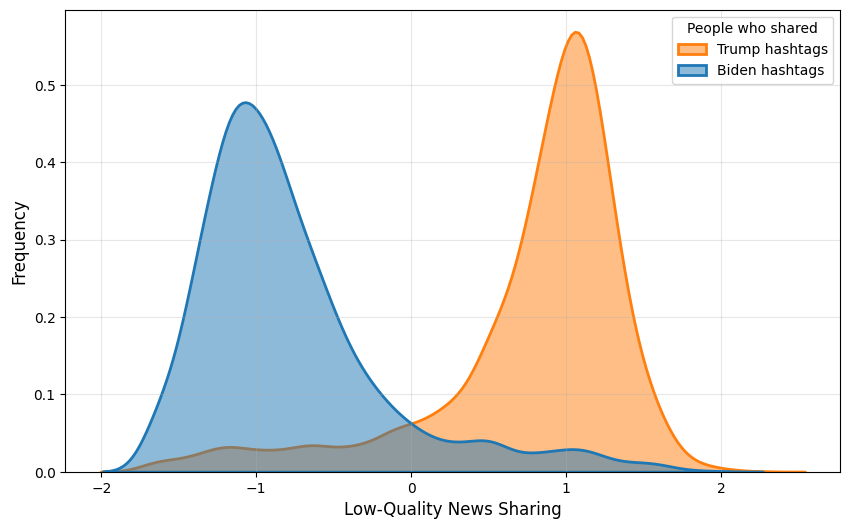

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the 'lowqual_pr2019_fc' column using z-scores
data['z_score_lowqual'] = (data['lowqual_pr2019_fc'] - data['lowqual_pr2019_fc'].mean()) / data['lowqual_pr2019_fc'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=data,
    x='z_score_lowqual',
    hue='politics_hashtag', #grouping by politics hashtag
    fill=True,
    alpha=0.5,
    linewidth=2,
)

# Customize the plot 
plt.xlabel("Low-Quality News Sharing", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="People who shared", labels=["Trump hashtags", "Biden hashtags"])
plt.grid(alpha=0.3)
plt.show()

Low-quality sharing as determined by crowdsourcing from 971 participants from the USA .

We are repeating the same process as before .

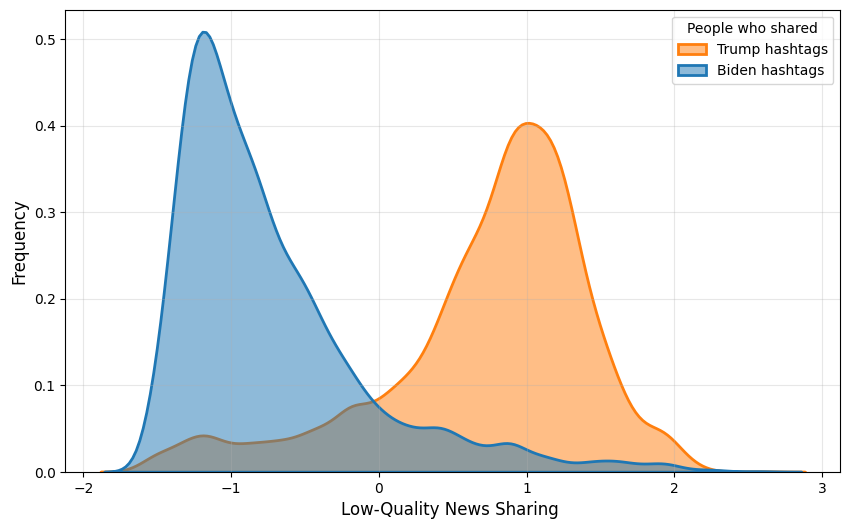

In [7]:
# Standardize the 'lowqual_pr2019_crowd' column using z-scores
data['z_score_lowqual_crowd'] = (data['lowqual_pr2019_crowd'] - data['lowqual_pr2019_crowd'].mean()) / data['lowqual_pr2019_crowd'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=data,
    x='z_score_lowqual_crowd',
    hue='politics_hashtag', #grouping by politics hashtag
    fill=True,
    alpha=0.5,
    linewidth=2,
    bw_adjust=0.8,
)

# Customize the plot
plt.xlabel("Low-Quality News Sharing ", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="People who shared", labels=["Trump hashtags", "Biden hashtags"])
plt.grid(alpha=0.3)
plt.show()

## Low-quality News Sharing on Twitter

### Performing a t-test statistic and report Cohen's $d$ and Hedges' $g$ for the following, grouped by `politics_hashtag`.

We are creating the required functions based on Cohen's d formula , pooled standard deviation formula and Hedges' g formula .

Then , we iterate through the columns to find for each one the required stats . We are using ttest from scipy.stats and we calculate variances manually with the formula provided .

We fit the formulas(functions) with the required variables and print results .

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Function to compute Cohen's d
def cohen_d(mean1, mean2, s_pooled):
    return (mean1 - mean2) / s_pooled

# Function to calculate pooled standard deviation
def pooled_std(n1, s1, n2, s2):
    return np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

# Function to compute Hedges' g
def hedges_g(d, n1, n2):
    correction = 1 - (3 / (4 * (n1 + n2) - 9))
    return d * correction

# Table that we will store out results into
results = []

# Columns that we are interested in . We will iterate later through this table
columns = [
    "lowqual_pr2019_fc", "lowqual_afm", "lowqual_mbfc",
    "lowqual_lasser2019", "lowqual_pr2019_crowd", "lowqual_pr2019_crowdrep"
]

for col in columns:
    # Group by `politics_hashtag` , remove any missing values 
    group1 = data[data['politics_hashtag'] == "#Trump2020"][col].dropna()
    group2 = data[data['politics_hashtag'] == "#VoteBidenHarris2020"][col].dropna()

    # Perform a T-test using scipy.stats
    t_stat, p_value = ttest_ind(group1, group2)

    # Calculating means
    mean1, mean2 = group1.mean(), group2.mean()

    # Calculating variances
    variance1 = np.sqrt(np.sum((group1 - mean1)**2) / (len(group1) - 1))
    variance2 = np.sqrt(np.sum((group2 - mean2)**2) / (len(group2) - 1))
    
    # Calculating size of each sample
    n1, n2 = len(group1), len(group2)

    # Pooled standard deviation
    s_pooled = pooled_std(n1, variance1, n2, variance2)

    # Cohen's d and Hedges' g
    d = cohen_d(mean1, mean2, s_pooled)
    g = hedges_g(d, n1, n2)

    results.append({"Column": col, "T-Statistic": t_stat, "P-Value": p_value, "Cohen's d": d, "Hedges' g": g})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print results dataframe
print(results_df)


                    Column  T-Statistic  P-Value  Cohen's d  Hedges' g
0        lowqual_pr2019_fc   119.223343      0.0   2.521188   2.520977
1              lowqual_afm   102.677719      0.0   2.164878   2.164698
2             lowqual_mbfc    97.592231      0.0   2.057540   2.057369
3       lowqual_lasser2019   102.633746      0.0   2.163831   2.163650
4     lowqual_pr2019_crowd   102.464014      0.0   2.166782   2.166601
5  lowqual_pr2019_crowdrep    61.071485      0.0   1.291464   1.291356


All the tests have a p-value of 0.0, indicating highly significant results.

The column with the highest t-statistic, lowqual_pr2019_fc (119.22), shows the strongest evidence of a significant effect.

5 out of 6 Cohen's d and Hedges' g values are above 2.0, signifying huge effects , while the other one is still above 1.2 , signifying very large effects. The largest effect size is observed for lowqual_pr2019_fc (Cohen's d = 2.521, Hedges' g = 2.520), while the smallest is for lowqual_pr2019_crowdrep (Cohen's d = 1.291, Hedges' g = 1.291).



### Sharing Lower-quality News Sources and Conservative Ideology

We are mapping back to 0 and 1 .

After dividing into two arrays our data , we are using pandas to compute correlations and then we generate a heatmap using pyplot and seaborn .

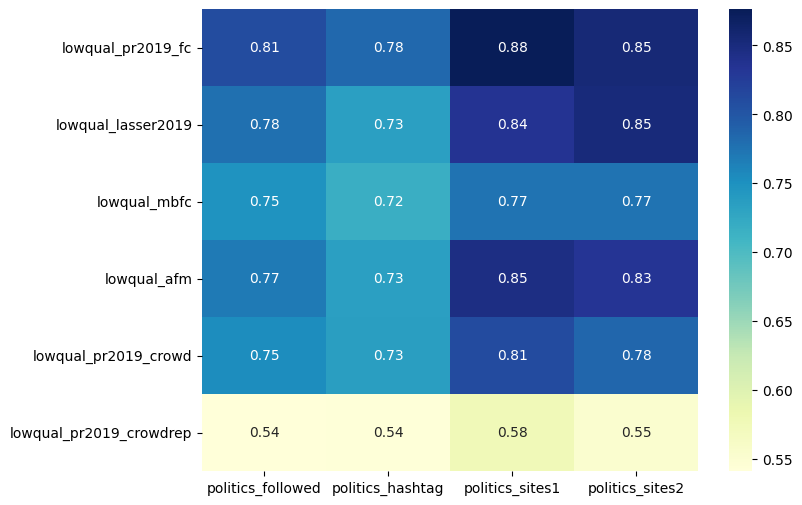

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map descriptive names to 0 and 1 again 
data['politics_hashtag'] = data['politics_hashtag'].map({
    '#VoteBidenHarris2020': 0,
    '#Trump2020': 1
})

# lower quality news sources 
lowerquality_news_columns = [
    "lowqual_pr2019_fc", "lowqual_lasser2019", "lowqual_mbfc",
    "lowqual_afm", "lowqual_pr2019_crowd", "lowqual_pr2019_crowdrep"
]

# ideology columns 
ideology_columns = [
    "politics_followed", "politics_hashtag", "politics_sites1", "politics_sites2"
]

# Compute correlations
correlation_matrix = data[lowerquality_news_columns + ideology_columns].corr()

# Subset the relevant correlations
heatmap_data = correlation_matrix.loc[lowerquality_news_columns, ideology_columns]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

## News Sharing Can Help Explain Suspension, Using Single Predictors

### Print the AUC and the confidence intervals in a table.

The analysis involved fitting Probit regression models for various predictor groups using statsmodels. Bootstrapping (100 iterations) was applied with numpy and pandas to estimate the Area Under the Curve (AUC) using scikit-learn. Confidence intervals for AUC were computed from the bootstrap distributions. 

In [10]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf  
from sklearn.metrics import roc_auc_score  
import matplotlib.pyplot as plt  
from matplotlib.patches import Patch

# Define predictor groups
# Each key represents a group of predictors, and the values are the column names in our dataset.
predictor_groups = {
    "Hashtag shared": ['politics_hashtag'],
    "News sites shared 1": ['politics_sites1'],
    "News sites shared 2": ['politics_sites2'],
    "Accounts followed": ['politics_followed'],
    "AFM ratings": ['lowqual_afm'],
    "MBFC ratings": ['lowqual_mbfc'],
    "Lasser ratings": ['lowqual_lasser2019'],
    "Fact-checker ratings": ['lowqual_pr2019_fc'],
    "Layperson ratings": ['lowqual_pr2019_crowd']
}

# Define the target variable (whether the user was suspended)
target = 'suspended'

# Array for storing results 
results = []

# Number of bootstrap samples to generate
# Bootstrapping helps estimate confidence intervals for the AUC by repeatedly sampling from the dataset.
n_bootstraps = 100
np.random.seed(42)  # Set a random seed 

# Loop through each predictor group
for group_name, predictors in predictor_groups.items():
    # Create a formula for the Probit model
    formula = f"{target} ~ {' + '.join(predictors)}"
    
    # Array for storing AUCs from each bootstrap iteration
    bootstrapped_aucs = []
    
    # Perform bootstrapping
    for _ in range(n_bootstraps):
        # Resample the data with replacement to create a bootstrap sample
        resampled_data = data.sample(frac=1, replace=True, random_state=None)
        resampled_data=resampled_data.dropna()

        # Fit the Probit model 
        probit_model = smf.probit(formula=formula, data=resampled_data).fit(disp=0)

        # Predict probabilities for the resampled data
        y_pred = probit_model.predict(resampled_data)

        # Calculate the AUC for this bootstrap sample
        auc = roc_auc_score(resampled_data[target], y_pred)
        bootstrapped_aucs.append(auc)
    
    # Calculate the mean AUC and the 95% confidence interval
    auc_mean = np.mean(bootstrapped_aucs)  # Average AUC across all bootstraps
    auc_ci_lower = np.percentile(bootstrapped_aucs, 2.5)  # Lower bound (2.5th percentile)
    auc_ci_upper = np.percentile(bootstrapped_aucs, 97.5)  # Upper bound (97.5th percentile)
    
    # Store the results for this group
    results.append({
        "Group": group_name,
        "AUC": auc_mean,
        "CI Lower": auc_ci_lower,
        "CI Upper": auc_ci_upper
    })

# Convert results into a DataFrame 
results_df = pd.DataFrame(results)
print(results_df)

                  Group       AUC  CI Lower  CI Upper
0        Hashtag shared  0.695241  0.680523  0.710921
1   News sites shared 1  0.710522  0.690687  0.726055
2   News sites shared 2  0.714940  0.699661  0.731246
3     Accounts followed  0.709084  0.689825  0.727152
4           AFM ratings  0.726916  0.708228  0.742065
5          MBFC ratings  0.717697  0.699081  0.733980
6        Lasser ratings  0.713711  0.697941  0.727298
7  Fact-checker ratings  0.713167  0.694569  0.730014
8     Layperson ratings  0.696813  0.678692  0.711806


All groups have AUC values above 0.69, indicating reasonably good predictive performance across the board.

The highest AUC is for AFM ratings (0.7269), suggesting it is the strongest predictor group.

### Plotting evaluations in a barchart

We use matplotlib.pyplot and seaborn  to make the plot .

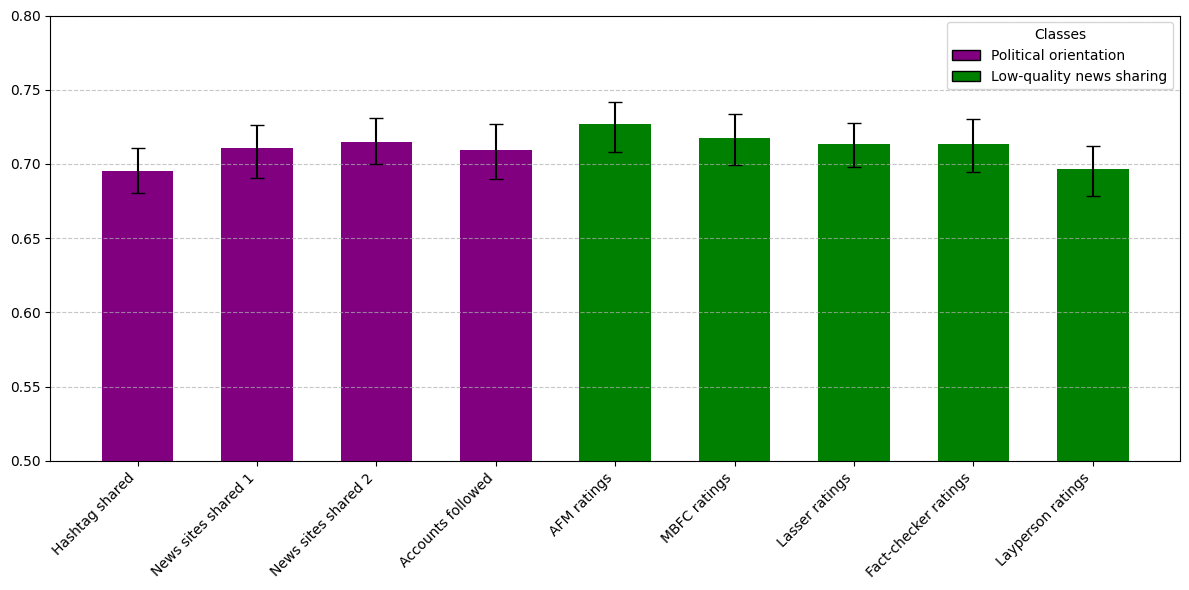

In [11]:
# Plot the results
plt.figure(figsize=(12, 6))  
bar_positions = range(len(results_df))  # Bar positions on the x-axis
bar_heights = results_df["AUC"]  # AUC values as bar heights
bar_errors = [
    results_df["AUC"] - results_df["CI Lower"],  # Lower error for confidence interval
    results_df["CI Upper"] - results_df["AUC"]  # Upper error for confidence interval
]

# Create the bar chart
plt.bar(
    bar_positions,             
    bar_heights,               
    yerr=bar_errors,           # Error bars (confidence intervals)
    capsize=5,                 # Add caps to the error bars
    color=["purple" if i <= 3 else "green" for i in bar_positions],  # Alternate colors
    width=0.6                  
)

# Create a custom legend
legend_elements = [
    Patch(facecolor="purple", edgecolor="black", label="Political orientation"),
    Patch(facecolor="green", edgecolor="black", label="Low-quality news sharing")
]

plt.legend(handles=legend_elements, title="Classes", loc="upper right")

# Customize the y-axis
plt.ylim(0.50, 0.80)  # Set the y-axis range 
plt.yticks(np.arange(0.50, 0.81, 0.05))  # Add ticks at intervals of 0.05
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal gridlines

# Customize the x-axis
plt.xticks(bar_positions, results_df["Group"], rotation=45, ha="right", fontsize=10)  # Rotate labels

# Final layout adjustments
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()  # Display the plot

## News Sharing Can Help Explain Suspension, Using Multiple Predictors

### Preprocessing the data . 

We are filling any missing values by using column mean .

Then we trasform specified variables related to tweeter metrics and introduce variable log_num_fol .

Then we winsorise the data . We have limits [0.01,0.01] (top 0.01 frm both sides) for the first valiables and [0,0.01] (top 0.01 from the top side) for the others .

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

# Data Preprocessing
# Fill missing values with the column mean
data.fillna(data.mean(), inplace=True)

# Log-transform specified variables
twitter_metrics = ['repeated_tweet_count', 'freq_pr_1h', 'num_followers', 'num_friends']
for col in twitter_metrics:
    data[f"log_{col}"] = np.log10(data[col] + 1)

# Create log_num_fol (log10 of num_friends/num_followers ratio)
data['log_num_fol'] = np.log10((data['num_friends'] + 1) / (data['num_followers'] + 1))

# Winsorize variables

# Winsorize both sides for the following variables
both_sides_vars = [
    'valence_neg','valence_neu','valence_pos',
    'barbera_std','politics_sites1_std','politics_sites2_ideo_std'
]

# Apply Winsorization (0.01 on both sides)
for col in both_sides_vars:
    data[col] = winsorize(data[col], limits=[0.01, 0.01])

# Winsorize upper side only for the following variables
upper_vars = [
    'moral_outrage', 'rewire_abuse', 'rewire_hate', 'rewire_profanity',
    'rewire_violent', 'rewire_sexually_explicit', 'jigsaw_toxicity',
    'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult',
    'jigsaw_profanity', 'jigsaw_threat'
]

# Apply Winsorization (0.01 on the upper side)
for var in upper_vars:
    data[var] = winsorize(data[var], limits=[0, 0.01])

#### Creating PCAs 
PCA (Principal Component Analysis) is a dimensionality reduction technique that summarizes related variables into uncorrelated components, capturing the most significant patterns or variance in the data while simplifying its structure.

Creating a single PCA component `pc1_misinfo` for the variables: `lowqual_pr2019_fc`, `lowqual_afm`, `lowqual_lasser2019`, `lowqual_mbfc`.

Then, we show the explained variance ratio and project low-quality news sharing dimensions for this new dimension.

In [13]:
# PCA for Low-Quality News Sharing
low_quality_vars = ['lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_lasser2019', 'lowqual_mbfc']

# Perform PCA
pca = PCA(n_components=1)
data['pc1_misinfo'] = pca.fit_transform(data[low_quality_vars])

# Explained variance ratio
print("Explained variance ratio for pc1_misinfo:", pca.explained_variance_ratio_[0])
print("\n")

# Project low-quality news sharing dimensions onto this new dimension
print(data[['pc1_misinfo']].head())


Explained variance ratio for pc1_misinfo: 0.8953832157157205


   pc1_misinfo
0    -0.277110
1     0.679741
2    -0.363936
3    -0.246960
4     0.407609


Creating a single PCA component `pc1_politics` for the variables : `politics_hashtag`, `politics_followed`, `politics_sites1`, `politics_sites2` .

We introduce variable `extremity` (abs value of the pca we got) . 

Then , we show the explained variance ratio and project political orientation dimensions for this new dimension.



In [14]:
# PCA for Political Orientation
politics_vars = ['politics_hashtag', 'politics_followed', 'politics_sites1', 'politics_sites2']
data['pc1_politics'] = pca.fit_transform(data[politics_vars])

# Variable extremity 
data['extremity'] = np.abs(data['pc1_politics'])

# Explained variance ratio
print("Explained variance ratio for pc1_politics:", pca.explained_variance_ratio_[0])
print("\n")

# Project political orientation dimensions for this new dimension 
print(data[['pc1_politics']].head())

Explained variance ratio for pc1_politics: 0.9144729383885002


   pc1_politics
0     -0.992403
1      2.382549
2     -2.525769
3     -1.959145
4      2.309391


Same method applied for `pc1_fol`

In [15]:
# PCA for Followers and Friends
fol_vars = ['log_num_followers', 'log_num_friends', 'log_num_fol']
data['pc1_fol'] = pca.fit_transform(data[fol_vars])
print("Explained variance ratio for pca followers :", pca.explained_variance_ratio_[0])
print(data[['pc1_fol']].head())

Explained variance ratio for pca followers : 0.8265031805039715
    pc1_fol
0  0.987924
1  0.434638
2  0.962089
3 -2.155235
4  0.365135


Same method applied for `pc1_valence`

In [16]:
# PCA for Valence Variables
valence_vars = ['valence_neg', 'valence_neu', 'valence_pos']
data['pc1_valence'] = pca.fit_transform(data[valence_vars])
print("Explained variance ratio for pca valens :", pca.explained_variance_ratio_)
print(data[['pc1_valence']].head())

Explained variance ratio for pca valens : [0.82069714]
   pc1_valence
0    -0.019562
1    -0.044001
2    -0.020899
3    -0.062974
4     0.031232


Regarding the harmful language variables , we perform PCA for three components , `pc1_harmful_language` , `pc2_harmful_language` , `pc3_harmful_language` .

We are creating a PCA with 3 components . Then we divide PCA into 3 parts , creating 3 different collumns for every pca in our dataframe .

In [17]:
# List of harmful language variables
harmful_language_vars = [
    'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent', 'rewire_sexually_explicit',
    'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult',
    'jigsaw_profanity', 'jigsaw_threat'
]

# Standardize the data 
scaler = StandardScaler()
harmful_data = scaler.fit_transform(data[harmful_language_vars])

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(harmful_data)

# Add the principal components to the DataFrame
data['pc1_harmful_language'] = pca_components[:, 0]
data['pc2_harmful_language'] = pca_components[:, 1]
data['pc3_harmful_language'] = pca_components[:, 2]

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratios for the components:")
print(f"PC1: {explained_variance[0]:.4f}, PC2: {explained_variance[1]:.4f}, PC3: {explained_variance[2]:.4f}")
print("\nFirst few rows of PCA results:")
print(data[['pc1_harmful_language', 'pc2_harmful_language', 'pc3_harmful_language']].head())


Explained variance ratios for the components:
PC1: 0.5617, PC2: 0.1187, PC3: 0.1070

First few rows of PCA results:
   pc1_harmful_language  pc2_harmful_language  pc3_harmful_language
0              2.413325              0.808106             -0.020028
1              1.240285              2.004389              1.177615
2              1.806147              0.554011             -0.187496
3              2.277250             -0.110233             -0.908351
4             -2.191412              0.607030              0.281485


##### Why Use Three Components Instead of One?

1. Retaining More Variance:
A single component (PC1) may not capture all the important patterns or variance in the data, especially if the harmful language variables represent multiple distinct aspects 
Adding two more components (PC2 and PC3) ensures that additional significant patterns or groupings in the data are preserved.

2. Interpretability:
Using multiple components can help differentiate between different types or dimensions of harmful language:
For example, PC1 might capture general toxicity, PC2 might highlight specific forms of threats or abuse, and PC3 could focus on profanity.

3. Complexity of Variables:
The harmful language variables include metrics from different tools (e.g., Rewire, Jigsaw), each designed to capture distinct dimensions of harmful behavior. It's likely that these dimensions cannot all be fully summarized by a single component.

### Processing the data 

#### Normalize independent variables by taking their z-scores

In [18]:
from scipy.stats import zscore

# List of independent variables to z-score
independent_vars = [
    'pc1_politics', 'pc1_misinfo', 'pc1_fol', 'pc1_harmful_language', 
    'pc2_harmful_language', 'pc3_harmful_language', 'pc1_valence',
    'tweets_in_2wk', 'botsentinel_score', 'extremity', 
    'moral_outrage', 'liwc_political', 'log_freq_pr_1h', 
    'log_repeated_tweet_count', 'barbera_std', 
    'politics_sites1_std', 'politics_sites2_ideo_std'
]

# Apply z-score normalization
for var in independent_vars:
    data[f'z_{var}'] = zscore(data[var])

# Check normalized data
print(data[[f'z_{var}' for var in independent_vars]].head())



   z_pc1_politics  z_pc1_misinfo  z_pc1_fol  z_pc1_harmful_language  \
0       -0.571330      -0.829166   0.965782                0.970918   
1        1.371643       2.033914   0.424896                0.498986   
2       -1.454095      -1.088967   0.940525                0.726641   
3       -1.127888      -0.738952  -2.106929                0.916173   
4        1.329526       1.219642   0.356951               -0.881639   

   z_pc2_harmful_language  z_pc3_harmful_language  z_pc1_valence  \
0                0.707154               -0.018457      -0.445450   
1                1.753992                1.085275      -1.001974   
2                0.484802               -0.172794      -0.475906   
3               -0.096462               -0.837125      -1.434005   
4                0.531197                0.259413       0.711210   

   z_tweets_in_2wk  z_botsentinel_score  z_extremity  z_moral_outrage  \
0        -0.098523            -0.860011    -0.921163        -0.113144   
1        -0.487135

#### Probit regression to predict suspension 

In [19]:
X = sm.add_constant(data[independent_vars])  # Add a constant to the independent variables 
y = data['suspended']
probit_model = sm.Probit(y, X).fit()
print(probit_model.summary())

p_values = probit_model.pvalues
print (p_values)

Optimization terminated successfully.
         Current function value: 0.302459
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                         Probit   Df Residuals:                     8982
Method:                           MLE   Df Model:                           17
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.1767
Time:                        00:25:44   Log-Likelihood:                -2722.1
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrobust   LLR p-value:                8.022e-238
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1800      0.197    -11.075      0.000      -2.566

#### Bonferronni Correction 

In [20]:
m = len(p_values)
bonferroni_adjusted = p_values * m
bonferroni_adjusted = np.minimum(bonferroni_adjusted, 1)  # Ensure adjusted p-values do not exceed 1
print("Bonferroni-adjusted p-values:\n", bonferroni_adjusted)

Bonferroni-adjusted p-values:
 const                       2.992302e-27
pc1_politics                2.836288e-01
pc1_misinfo                 6.180347e-08
pc1_fol                     1.000000e+00
pc1_harmful_language        6.034505e-10
pc2_harmful_language        1.210956e-02
pc3_harmful_language        4.156522e-02
pc1_valence                 8.571712e-01
tweets_in_2wk               1.366074e-54
botsentinel_score           4.191167e-07
extremity                   1.432334e-09
moral_outrage               1.000000e+00
liwc_political              1.000000e+00
log_freq_pr_1h              3.664431e-06
log_repeated_tweet_count    1.000000e+00
barbera_std                 1.000000e+00
politics_sites1_std         1.000000e+00
politics_sites2_ideo_std    1.025104e-01
dtype: float64


#### Holm-Bonferroni Correction 

In [21]:
# Sort p-values and their indices
sorted_pvals = p_values.sort_values()
sorted_indices = sorted_pvals.index

# Apply Holm-Bonferroni adjustment
holm_adjusted = []
for i, p in enumerate(sorted_pvals):
    adjusted_p = (m - i) * p  # Multiply by Holm-Bonferroni factor
    adjusted_p = min(adjusted_p, 1)  # Cap at 1
    holm_adjusted.append(adjusted_p)

# Ensure monotonicity
holm_adjusted = pd.Series(holm_adjusted, index=sorted_indices)
holm_adjusted = holm_adjusted.cummax()  # Ensure adjusted p-values are non-decreasing

# Align Holm-Bonferroni adjusted p-values to original variable order
holm_adjusted_final = holm_adjusted.reindex(p_values.index)

# Print results
print("\nHolm-Bonferroni Adjusted P-Values:\n", holm_adjusted_final)



Holm-Bonferroni Adjusted P-Values:
 const                       2.826063e-27
pc1_politics                1.260573e-01
pc1_misinfo                 4.806937e-08
pc1_fol                     1.000000e+00
pc1_harmful_language        5.364004e-10
pc2_harmful_language        7.400287e-03
pc3_harmful_language        2.309179e-02
pc1_valence                 3.333444e-01
tweets_in_2wk               1.366074e-54
botsentinel_score           3.026954e-07
extremity                   1.193611e-09
moral_outrage               1.000000e+00
liwc_political              1.000000e+00
log_freq_pr_1h              2.442954e-06
log_repeated_tweet_count    1.000000e+00
barbera_std                 5.556975e-01
politics_sites1_std         1.000000e+00
politics_sites2_ideo_std    5.125518e-02
dtype: float64


#### Analysis

Variables with adjusted p-values ≤ 0.05 are considered statistically significant. After Bonferroni Correction and Holm-Bonferroni Correction we get that statistically significant predictors are pc1_misinfo, pc1_harmful_language, pc2_harmful_language, pc3_harmful_language, tweets_in_2wk, botsentinel_score, extremity, log_freq_pr_1h . Every predictor that refers to political orientation is not significant .

The data indicate that behaviors associated with verbal abuse, misinformation, harmful language, and extreme expression are more strongly linked to suspension than political orientation. 

While political orientation might appear influential in some raw analyses, it does not pass the rigorous significance tests here, suggesting that platform enforcement prioritize behavioral factors over political alignment.

#### Same analysis using Logit

In [22]:
logit_model = sm.Logit(y, X).fit()
# print(logit_model.summary())
p_values = logit_model.pvalues
print (p_values)

Optimization terminated successfully.
         Current function value: 0.302749
         Iterations 7
const                       2.239248e-25
pc1_politics                4.245330e-03
pc1_misinfo                 3.783945e-09
pc1_fol                     3.973752e-01
pc1_harmful_language        3.121885e-10
pc2_harmful_language        1.069526e-03
pc3_harmful_language        2.273992e-03
pc1_valence                 5.264911e-02
tweets_in_2wk               1.910543e-57
botsentinel_score           9.545555e-09
extremity                   1.045625e-12
moral_outrage               5.308526e-01
liwc_political              1.171476e-01
log_freq_pr_1h              9.214603e-07
log_repeated_tweet_count    6.986682e-01
barbera_std                 7.473627e-02
politics_sites1_std         1.768758e-01
politics_sites2_ideo_std    9.570048e-03
dtype: float64


##### Bonferronni Correction - Logit 

In [23]:
m = len(p_values)
bonferroni_adjusted = p_values * m
bonferroni_adjusted = np.minimum(bonferroni_adjusted, 1)  # Ensure adjusted p-values do not exceed 1
print("Bonferroni-adjusted p-values:\n", bonferroni_adjusted)

Bonferroni-adjusted p-values:
 const                       4.030646e-24
pc1_politics                7.641593e-02
pc1_misinfo                 6.811101e-08
pc1_fol                     1.000000e+00
pc1_harmful_language        5.619393e-09
pc2_harmful_language        1.925147e-02
pc3_harmful_language        4.093186e-02
pc1_valence                 9.476840e-01
tweets_in_2wk               3.438978e-56
botsentinel_score           1.718200e-07
extremity                   1.882126e-11
moral_outrage               1.000000e+00
liwc_political              1.000000e+00
log_freq_pr_1h              1.658629e-05
log_repeated_tweet_count    1.000000e+00
barbera_std                 1.000000e+00
politics_sites1_std         1.000000e+00
politics_sites2_ideo_std    1.722609e-01
dtype: float64


##### Holm-Bonferroni Correction - Logit

In [24]:
# Sort p-values and their indices
sorted_pvals = p_values.sort_values()
sorted_indices = sorted_pvals.index

# Apply Holm-Bonferroni adjustment
holm_adjusted = []
for i, p in enumerate(sorted_pvals):
    adjusted_p = (m - i) * p  # Multiply by Holm-Bonferroni factor
    adjusted_p = min(adjusted_p, 1)  # Cap at 1
    holm_adjusted.append(adjusted_p)

# Ensure monotonicity
holm_adjusted = pd.Series(holm_adjusted, index=sorted_indices)
holm_adjusted = holm_adjusted.cummax()  # Ensure adjusted p-values are non-decreasing

# Align Holm-Bonferroni adjusted p-values to original variable order
holm_adjusted_final = holm_adjusted.reindex(p_values.index)

# Print results
print("\nHolm-Bonferroni Adjusted P-Values:\n", holm_adjusted_final)


Holm-Bonferroni Adjusted P-Values:
 const                       3.806721e-24
pc1_politics                3.820797e-02
pc1_misinfo                 5.297523e-08
pc1_fol                     1.000000e+00
pc1_harmful_language        4.682827e-09
pc2_harmful_language        1.176479e-02
pc3_harmful_language        2.273992e-02
pc1_valence                 3.685438e-01
tweets_in_2wk               3.438978e-56
botsentinel_score           1.240922e-07
extremity                   1.673001e-11
moral_outrage               1.000000e+00
liwc_political              5.857379e-01
log_freq_pr_1h              1.105752e-05
log_repeated_tweet_count    1.000000e+00
barbera_std                 4.484176e-01
politics_sites1_std         7.075031e-01
politics_sites2_ideo_std    7.656039e-02
dtype: float64


##### Analysis

We are getting almost the same results like probit , but , logit analysis even after Holm-Bonferroni Correction suggests that pc1_politics has some predictive power . That means that with the value of p=0.0382 , is a predictor worth considerating. For Bronferroni Correction is an insignificant factor . 

This suggests that while there may be a weak association between political orientation and the outcome (e.g., account suspension), it is not robust across all methods of analysis.
 
Political orientation (pc1_politics) shows marginal significance in the logit model .

Political orientation may have a minor association with the outcome, as seen in the logit model, but the evidence is not strong enough to conclude it is a deciding factor. The outcome appears to be more directly influenced by behavioral variables.